<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr2/blob/Sidorov-Alexander-folder/Copy_of_Profpatolog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Concatenate,Dense, Activation, Dropout, BatchNormalization, concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from google.colab import drive
import zipfile
import os

In [ ]:
#filelist = [_ for _ in os.listdir('.') if _.endswith('.csv')]
#for filename in filelist:
#  print(filename)
#  d = pd.read_csv(filename, sep=';', header=0, index_col=0)
#  print(d.shape)


In [2]:
drive.mount('/content/gdrive')
!cp /content/gdrive/MyDrive/Dataset/Dataset.zip	.
z= zipfile.ZipFile('Dataset.zip','r')
!unzip -q -o 'Dataset.zip' -d .

Mounted at /content/gdrive


In [3]:
df1 = pd.read_excel(open('/content/Dataset1.xlsx','rb'))
print(df1.shape)
df1.head(3)

(1982, 4587)


,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df3 = pd.read_csv('/content/Dataset3.csv', sep=';', header=0, dtype=str)
print(df3.shape)
df3.head(3)

(32686, 289)


,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,false,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,false,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,false,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#for col in df3.columns:
#  if col not in df1.columns:
#    print( col)

In [5]:
df = pd.concat([df1, df3])
print(df.shape)
df.head(3)
#df_copy = df.copy()

(34668, 4768)


,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп2_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп2_МКБ103,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ102
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24 00:00:00,Женский,Женский,2022-01-25 00:00:00,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18 00:00:00,Мужской,Мужской,2022-02-02 00:00:00,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08 00:00:00,Мужской,Мужской,2022-02-15 00:00:00,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df=df_copy.copy()

In [6]:
# Вывод количества записей по классам
def print_class(df, column_name, class_list):
  print(class_list)
  for class_name in class_list:
    count = len(df[df[column_name] == class_name])
    print(f'Количество записей для класса {class_name}: {count}')

# Поиск колонок и вывод уникальных значений
def Find_Column(df, name):
  pred_cols = [col for col in df.columns if name in col]
  print(f'Найдено {len(pred_cols)} колонок')
  for column_name in pred_cols:
      print(f'{df.columns.get_loc(column_name)} {column_name}')
      unique_data = df[column_name].unique()
      print(f'   {unique_data[0:10]}')

In [7]:
# Удаление строк без заключения
print('Datafrme до обработки')
print(df.shape)
class_list =['Годен','ГоденСКоррекциейЗрения','ГоденСКоррекциейСлуха','НуждаетсяВДообследованииИЛечении','ВременноНегоден','ОграниченноГоден','ГоденБезРаботНаВысотах']
mask= df['ЗаключениеМК'].str.contains('|'.join(class_list))>0
df = df[ mask]
print('Datafrme поле удаления пустых заключений')
print(df.shape)
# количество записей по классам
print('Rоличество записей по классам')
print_class(df, 'ЗаключениеМК', class_list)
# Сокращение классов до 3
print('Сокращение классов до 3 классов')
df.loc[df['ЗаключениеМК'] == 'ГоденСКоррекциейЗрения','ЗаключениеМК'] = 'ОграниченноГоден'
df.loc[df['ЗаключениеМК'] == 'ГоденБезРаботНаВысотах','ЗаключениеМК'] = 'ОграниченноГоден'
df.loc[df['ЗаключениеМК'] == 'ГоденСКоррекциейСлуха' ,'ЗаключениеМК'] = 'ОграниченноГоден'
df.loc[df['ЗаключениеМК'] == 'НуждаетсяВДообследованииИЛечении', 'ЗаключениеМК'] = 'ВременноНегоден'
# количество записей по классам
#print_class(df, 'ЗаключениеМК', class_list)
class_list =['Годен','ВременноНегоден','ОграниченноГоден']
print_class(df, 'ЗаключениеМК', class_list)
# Переиндексация df
df = df.reset_index(drop=True)

Datafrme до обработки
(34668, 4768)
Datafrme поле удаления пустых заключений
(20768, 4768)
Rоличество записей по классам
['Годен', 'ГоденСКоррекциейЗрения', 'ГоденСКоррекциейСлуха', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден', 'ГоденБезРаботНаВысотах']
Количество записей для класса Годен: 19416
Количество записей для класса ГоденСКоррекциейЗрения: 1237
Количество записей для класса ГоденСКоррекциейСлуха: 5
Количество записей для класса НуждаетсяВДообследованииИЛечении: 42
Количество записей для класса ВременноНегоден: 9
Количество записей для класса ОграниченноГоден: 6
Количество записей для класса ГоденБезРаботНаВысотах: 53
Сокращение классов до 3 классов
['Годен', 'ВременноНегоден', 'ОграниченноГоден']
Количество записей для класса Годен: 19416
Количество записей для класса ВременноНегоден: 51
Количество записей для класса ОграниченноГоден: 1301


In [8]:
#Вывод женских диагнозов
diagnos_columns = [col for col in df.columns if 'Диагноз_ЗначениеПредставление' in col]
df['diagnos_rows'] = [' '.join([str(row[df.columns.get_loc(col)]) for col in diagnos_columns]) for row in df.values]
df['diagnos_rows'] = [re.sub('\[.*?\]', '', dstr).replace('nan','').replace('_x000D_','').replace('\n','') for dstr in df['diagnos_rows']]
mask =  (df['КлиентПол'] == 'Женский') & ((df['ЗаключениеМК'] == 'ОграниченноГоден') | (df['ЗаключениеМК'] == 'ВременноНегоден'))
display(df[mask][['ЗаключениеМК', 'diagnos_rows']])

,ЗаключениеМК,diagnos_rows
23,ОграниченноГоден,Общий медицинский осмотр МиопияОписание: Мио...
33,ОграниченноГоден,Общий медицинский осмотр Постменопаузный атр...
35,ОграниченноГоден,Общий медицинский осмотр ГиперметропияОписан...
60,ОграниченноГоден,Общий медицинский осмотр МиопияОписание: Мио...
86,ОграниченноГоден,Общий медицинский осмотр АстигматизмОписание...
...,...,...
20603,ОграниченноГоден,...
20606,ОграниченноГоден,...
20715,ОграниченноГоден,...
20717,ОграниченноГоден,...


In [9]:
# Аугментация данных
mask = (df['ЗаключениеМК'] == 'ОграниченноГоден') | (df['ЗаключениеМК'] == 'ВременноНегоден')
copied_rows = df[mask].copy()
copied_rows['КлиентДатаРождения'] = pd.to_datetime(copied_rows['КлиентДатаРождения']) - pd.DateOffset(years=5)
copied_rows['КлиентПол'] = 'Мужской'
df = pd.concat([df, copied_rows], ignore_index=True)
copied_rows['КлиентПол'] = 'Женский'
df = pd.concat([df, copied_rows], ignore_index=True)
copied_rows['КлиентДатаРождения'] = pd.to_datetime(copied_rows['КлиентДатаРождения']) + pd.DateOffset(years=10)
copied_rows['КлиентПол'] = 'Мужской'
df = pd.concat([df, copied_rows], ignore_index=True)
copied_rows['КлиентПол'] = 'Женский'
df = pd.concat([df, copied_rows], ignore_index=True)
print_class(df, 'ЗаключениеМК', class_list)

['Годен', 'ВременноНегоден', 'ОграниченноГоден']
Количество записей для класса Годен: 19416
Количество записей для класса ВременноНегоден: 255
Количество записей для класса ОграниченноГоден: 6505


In [ ]:
# Список колонок для токенизации
#Find_Column( df, 'Диагноз_ЗначениеПредставление')

In [ ]:
#Find_Column( df, 'МКБ')

In [ ]:
#Find_Column( df, 'ВредныеФакторы')

In [10]:
def int_to_ohe(arg, class_list):
  # Определение размерности выходного вектора
  num_classes = len(class_list)
  # Поиск верного интервала для входного значения
  for i in range(num_classes - 1):
    if arg < class_list[i]:
      cls = i                       # Интервал найден - назначение класса
      break
    else:                                 # Внимание: for/else
      cls = num_classes - 1             # Интервал не найден - последний класс
  # Возврат в виде one hot encoding-вектора
  return utils.to_categorical(cls, num_classes)

def str_to_multi(arg,class_dict):
  # Определение размерности выходного вектора
  num_classes = len(class_dict)
  # Создание нулевого вектора
  result = np.zeros(num_classes)
  # Поиск значения в словаре и, если найдено,
  # выставление 1. на нужной позиции
  if type(arg) is str:
    if type(class_dict) is list:
      for cls, value in enumerate(class_dict):
        if value == arg:
          result[cls] = 1.
    else:
      for value, cls in class_dict.items():
        if value == arg:
          result[cls] = 1.
  return result

In [11]:
# Токенайзер с диагнозами
diagnos_columns = [col for col in df.columns if 'Диагноз_ЗначениеПредставление' in col]
df['diagnos_rows'] = [' '.join([str(row[df.columns.get_loc(col)]) for col in diagnos_columns]) for row in df.values]
df['diagnos_rows'] = [re.sub('\[.*?\]', '', dstr).replace('nan','').replace('_x000D_','').replace('\n','') for dstr in df['diagnos_rows']]
diagnos_token = Tokenizer(num_words=400, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
diagnos_token.fit_on_texts(df['diagnos_rows'])
df['diagnos_index'] = diagnos_token.texts_to_sequences(df['diagnos_rows'])
df['diagnos_bag'] = diagnos_token.sequences_to_matrix(df['diagnos_index']).tolist()
print(len(diagnos_token.word_index) + 1)
print(diagnos_token.word_index)
print(df.loc[1480,'diagnos_rows'])
print(df.loc[1480,'diagnos_index'])
print(df.loc[1480,'diagnos_bag'])

362
{'unknown': 1, 'общий': 2, 'медицинский': 3, 'осмотр': 4, 'миопия': 5, 'ои': 6, 'ст': 7, 'болезнь': 8, 'без': 9, 'с': 10, 'миопияописание': 11, 'сердца': 12, 'гипертензивная': 13, 'преимущественным': 14, 'поражением': 15, 'застойной': 16, 'сердечной': 17, 'недостаточности': 18, 'астигматизм': 19, 'астигматизмописание': 20, 'гиперметропия': 21, 'кариес': 22, 'сл': 23, 'миопический': 24, 'ср': 25, 'дентина': 26, 'гиперметропияописание': 27, 'хронический': 28, 'обоих': 29, 'сложный': 30, 'глаз': 31, 'ос': 32, '1': 33, 'степени': 34, 'зубной': 35, 'налет': 36, 'смешанный': 37, 'апикальный': 38, 'периодонтит': 39, 'апикальная': 40, 'гранулема': 41, 'слабой': 42, 'од': 43, 'или': 44, 'гастрит': 45, 'и': 46, 'неуточненная': 47, 'поверхностный': 48, 'матки': 49, 'амблиопия': 50, 'неуточненный': 51, 'последствия': 52, 'хроническое': 53, 'выявленное': 54, 'другие': 55, 'старческая': 56, 'начальная': 57, 'средней': 58, 'глаза': 59, 'неуточненное': 60, 'простой': 61, 'катаракта': 62, 'ранее': 

In [13]:
# Токенайзер с кодами МКБ
mkb_columns = [col for col in df.columns if 'МКБ' in col]
df['mkb_rows'] = [' '.join([str(row[df.columns.get_loc(col)]) for col in mkb_columns]) for row in df.values]
df['mkb_rows'] = [re.sub('\[.*?\]', '', dstr).replace('nan','').replace('_x000D_','').replace('\n','') for dstr in df['mkb_rows']]
mkb_token = Tokenizer(num_words=100, filters='!"#$%&()*+,-–—/:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
mkb_token.fit_on_texts(df['mkb_rows'])
df['mkb_index'] = mkb_token.texts_to_sequences(df['mkb_rows'])
df['mkb_bag'] = mkb_token.sequences_to_matrix(df['mkb_index']).tolist()
print(len(mkb_token.word_index) + 1)
print(mkb_token.word_index)
print(df.loc[1988,'mkb_rows'])
print(df.loc[1988,'mkb_index'])
print(df.loc[1988,'mkb_bag'])

354
{'unknown': 1, 'z00.0': 2, 'h52.1': 3, 'i11.9': 4, 'h52.2': 5, 'h52.0': 6, 'k29.3': 7, 'k29.5': 8, 'k29.6': 9, 'd25': 10, 'h90.3': 11, 'h91.1': 12, 'h25.0': 13, 'h53.0': 14, 'd25.9': 15, 'h74.1': 16, 'n60.2': 17, 'k29.8': 18, 'k86.1': 19, 'k26.7': 20, 't94.0': 21, 'r73.9': 22, 'm42.1': 23, 'h90.4': 24, 'h47.2': 25, 'k40.9': 26, 'n83.2': 27, 'l40.0': 28, 'f06.6': 29, 'r25.1': 30, 'g90.8': 31, 'n70.9': 32, 'g90.9': 33, 'f06.8': 34, 'k80.2': 35, 'i67.2': 36, 'h66.1': 37, 't90.4': 38, 'e11.9': 39, 'i25.8': 40, 'f10.3': 41, 'i25.2': 42, 'h50.9': 43, 'i11.0': 44, 'n80.0': 45, 'i83.9': 46, 'i25.9': 47, 'h25': 48, 'e11.8': 49, 'j45.9': 50, 'h50.0': 51, 'h26.9': 52, 'i77.9': 53, 'i72.1': 54, 'z32.1': 55, 'g25.0': 56, 'k29.7': 57, 'h11.0': 58, 'j33.0': 59, 'i49.9': 60, 'e14.9': 61, 'h40.1': 62, 'h27.0': 63, 'k26.9': 64, 'k80.5': 65, 'k20': 66, 'i67.9': 67, 'h53.5': 68, 'h50.1': 69, 'f60.3': 70, 'h52.4': 71, 'd50.9': 72, 'h02.4': 73, 'h01.0': 74, 'k82.9': 75, 'n20.9': 76, 'n86': 77, 'g99.0': 

In [14]:
#Токенайзер профессий
df['prof_index']= ' '
df['prof_bag'] = ' '
prof_token = Tokenizer(num_words=600, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
prof_token.fit_on_texts(df['Профессия'].astype(str).replace('nan',''))
df['prof_index'] = prof_token.texts_to_sequences(df['Профессия'].astype(str).replace('nan',''))
df['prof_bag'] = prof_token.sequences_to_matrix(df['prof_index']).tolist()
print(len(prof_token.word_index) + 1)
print(prof_token.word_index)
print(df.loc[1478,'Профессия'])
print(df.loc[1478,'prof_index'])
print(df.loc[1478,'prof_bag'])

1911
{'unknown': 1, 'по': 2, 'инженер': 3, 'водитель': 4, 'разряда': 5, 'и': 6, 'специалист': 7, 'машинист': 8, 'автомобиля': 9, 'ведущий': 10, 'слесарь': 11, 'монтажник': 12, '6': 13, 'оператор': 14, 'категории': 15, '5': 16, 'повар': 17, 'начальник': 18, 'ремонту': 19, 'технологических': 20, 'мастер': 21, 'старший': 22, 'продавец': 23, 'менеджер': 24, 'главный': 25, '4': 26, 'отдела': 27, 'работ': 28, '1': 29, 'трубопроводов': 30, 'электромонтажник': 31, 'скважин': 32, '2': 33, 'электрогазосварщик': 34, 'вышкомонтажник': 35, 'помощник': 36, '3': 37, 'с': 38, 'на': 39, 'администратор': 40, 'сервис': 41, 'работник': 42, 'кассир': 43, 'техник': 44, 'торгового': 45, 'обслуживанию': 46, 'электромонтер': 47, 'зала': 48, 'учитель': 49, 'врач': 50, 'электрооборудования': 51, 'капитального': 52, 'ремонта': 53, 'геофизик': 54, 'крана': 55, 'рабочий': 56, 'установок': 57, 'экспедитор': 58, 'заместитель': 59, 'директор': 60, 'участка': 61, 'конструкций': 62, 'бурению': 63, 'грузчик': 64, 'руково

In [15]:
#Токенайзер цехов
df['work_index']= ' '
df['work_bag'] = ' '
work_token = Tokenizer(num_words=300, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
work_token.fit_on_texts(df['Цех'].astype(str).replace('nan',''))
df['work_index'] = work_token.texts_to_sequences(df['Цех'].astype(str).replace('nan',''))
df['work_bag'] = work_token.sequences_to_matrix(df['work_index']).tolist()
print(len(work_token.word_index) + 1)
print(work_token.word_index)
print(df.loc[1300,'Цех'])
print(df.loc[1300,'work_index'])
print(df.loc[1300,'work_bag'])

782
{'unknown': 1, 'без': 2, 'отдела': 3, 'отдел': 4, 'уфа': 5, 'и': 6, 'участок': 7, 'цех': 8, 'ооо': 9, 'служба': 10, 'группа': 11, 'по': 12, '025': 13, 'ремонта': 14, 'скважин': 15, 'текущего': 16, 'капитального': 17, '№2': 18, 'центр': 19, 'производственный': 20, 'вс': 21, 'подразделение': 22, 'упнр': 23, 'г': 24, 'межрайонный': 25, 'обособленное': 26, 'то': 27, 'производство': 28, 'инженерно': 29, 'эксплуатации': 30, 'обеспечения': 31, '№1': 32, '«территория': 33, 'еды': 34, '102»': 35, 'ашан': 36, 'сити': 37, 'с': 38, 'технический': 39, 'техносервис': 40, 'коммерцмагазина': 41, 'отделение': 42, 'приволжский': 43, 'филиал': 44, 'фгуп': 45, 'радон': 46, 'благовещенское': 47, 'в': 48, '№': 49, 'сектор': 50, '1': 51, 'логистики': 52, 'администрация': 53, 'детский': 54, 'сад': 55, 'лаборатория': 56, 'проектирования': 57, 'бортового': 58, 'дрс': 59, 'обработке': 60, 'на': 61, 'умный': 62, 'ритейл': 63, 'дмш': 64, 'диагностики': 65, 'гдс': 66, 'бригада': 67, 'питания': 68, 'технологичес

In [16]:
# Классы ВредныеФакторы
hazard_token = Tokenizer(num_words=300, filters='!"#$%&()*+,-–—/:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
hazard_token.fit_on_texts(df['ВредныеФакторы'].astype(str).replace('nan',''))
df['hazard_index'] = hazard_token.texts_to_sequences(df['ВредныеФакторы'].astype(str).replace('nan',''))
df['hazard_bag'] = hazard_token.sequences_to_matrix(df['hazard_index']).tolist()
print(len(hazard_token.word_index) + 1)
print(hazard_token.word_index)
print(df.loc[2800,'ВредныеФакторы'])
print(df.loc[2800,'hazard_index'])
print(df.loc[2800,'hazard_bag'])

184
{'unknown': 1, '5.1': 2, '4.4': 3, '11.1': 4, '23': 5, '6.1': 6, '4.2.5': 7, '18.1': 8, '6.2': 9, '11.4': 10, '9': 11, '4.7': 12, '6': 13, '15': 14, '4.3.2': 15, '1.50': 16, '18.2': 17, '17': 18, '4.3.1': 19, '4.8': 20, '27': 21, '25': 22, '11.3': 23, '1.1': 24, '13': 25, '04.02.2005': 26, '3.1.7': 27, '26': 28, '12': 29, '4.1': 30, '1.39': 31, '18': 32, '1.29.2': 33, '1.30.1': 34, '11': 35, '4.2.1': 36, '1.37.1': 37, '1.14.2': 38, '1.3': 39, '5.2.1': 40, '1.36.1': 41, '22': 42, '4.9': 43, '1.23': 44, '1.8.1.1': 45, '18.янв': 46, '1.34.1': 47, '8': 48, '05.янв': 49, '1.15': 50, '3.1.2': 51, '4.2.3': 52, '3.4': 53, '5.2': 54, '1.29.1': 55, '18.фев': 56, '4.5': 57, '4.2.4': 58, '11.янв': 59, '4.2.2': 60, '4.10': 61, '1.19.1': 62, '3.1.8.2': 63, '1.2': 64, '4.6': 65, '1.8.1.2': 66, '2.4.2': 67, '3.1': 68, '4.2': 69, '1.48': 70, '4.3': 71, '3.1.8.3': 72, '1.17': 73, '1.36': 74, '1.27.1': 75, '3.1.1': 76, '14': 77, '1.18.3': 78, '2.4.3': 79, '1.5': 80, '1.8.2.1': 81, '3.1.8': 82, '24': 

In [17]:
# Классы с заключениями
fit_columns = [col for col in df.columns if 'ГоденНегоден_ЗначениеПредставление' in col]
print(len(fit_columns))
for index, row in df.iterrows():
   f = []
   for col in fit_columns:
    f.append(', '.join(str(x) for x in str_to_multi(row[col],class_list)))
   df.loc[index, 'fit_bag'] = ', '.join(str(x) for x in f)
print(df.loc[6,'fit_bag'])

31
0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0


In [18]:
# Классы порогов возраста
age_class = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]
df['age_bag'] = ''
for index, row in df.iterrows():
  v = pd.to_datetime(row['ДатаЗавершенияМедосмотра'], errors='coerce').year-pd.to_datetime(row['КлиентДатаРождения'], errors='coerce').year
  df.loc[index, 'age_bag'] = ', '.join(str(x) for x in int_to_ohe(v, age_class))
#  print(row['age_bag'])
print(df.loc[6,'age_bag'])

0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0


In [19]:
# Класс пола
for index, row in df.iterrows():
  if row['КлиентПол'] == 'Мужской':
    df.loc[index, 'sex_bag'] = '1'
  else:
    df.loc[index, 'sex_bag'] = '0'
print(f"{df.loc[2800,'КлиентПол']} {df.loc[2800,'sex_bag']}")

Мужской 1


In [20]:
def extract_row_data(index, row):
  # Извлечение и преобразование данных
  age = [float(num_str) for num_str in row.loc['age_bag'].split(",")]
  # Пол
  sex = [float(num_str) for num_str in row.loc['sex_bag'].split(",")]
  # Заключения
  fit = [float(num_str) for num_str in row.loc['fit_bag'].split(",")]
  # Токенайзер с диагнозами
  diagnos = row.loc['diagnos_bag']
  # Токенайзер с кодами МКБ
  mkb = row['mkb_bag']
  #Токенайзер профессий
  prof = row['prof_bag']
  #Токенайзер цехов
  work = row['work_bag']
  # Вредность
  hazard = row['hazard_bag']
  x_data1 = np.hstack([age, sex,work])
  x_data2 = np.hstack([fit])
  x_data3 = np.hstack([diagnos, mkb])
  x_data4 = np.hstack([hazard])
  x_data5 = np.hstack([prof])
  y_data =  np.hstack([class_list.index(row.loc['ЗаключениеМК'])])
 # if y_data > 0 and index < 500:
 #   print(f"y_data {y_data} {row.loc['ЗаключениеМК']}")
 #   print(f"x_data1 {x_data1[:30]} ")# {row.loc['diagnos_index']} {row.loc['diagnos_rows']}")
 #   print(f"x_data3 {x_data3[:30]} ")# {row.loc['diagnos_index']} {row.loc['diagnos_rows']}")
 #   print(f"x_data2 {x_data2[:30]} {row.loc['diagnos_index']} {row.loc['diagnos_rows']}")
  return x_data1, x_data2, x_data3, x_data4, x_data5, y_data

# Создание общей выборки
def construct_train_data():
  x_data1 = []
  x_data2 = []
  x_data3 = []
  x_data4 = []
  x_data5 = []
  y_data = []
  num = 0
  for index, row in df.iterrows():
    x1, x2, x3, x4, x5, y = extract_row_data(index, row)
    num +=1
    x_data1.append( x1)
    x_data2.append( x2)
    x_data3.append( x3)
    x_data4.append( x4)
    x_data5.append( x5)
    y_data.append(y)
  return np.array(x_data1),  np.array(x_data2), np.array(x_data3), np.array(x_data4), np.array(x_data5), np.array(y_data)

In [21]:
#print(df.shape)
x_data1, x_data2, x_data3, x_data4, x_data5, y_data = construct_train_data()
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)
print(f' x_data1 {x_data1.shape} \t x_data2 {x_data2.shape} \t x_data3 {x_data3.shape} \t x_data4 {x_data4.shape}\t x_data5 {x_data5.shape} \t y_data {y_data.shape}')
# Разбиение наборов на общую и тестовую выборки
x_all1, x_test1, x_all2, x_test2, x_all3, x_test3, x_all4, x_test4, x_all5, x_test5, y_all, y_test = train_test_split(x_data1, x_data2, x_data3, x_data4, x_data5, y_data,
                                                test_size=0.15, shuffle=True, random_state = 6)
print(f' x_all1 {x_all1.shape} \t x_all2 {x_all2.shape} \t x_all3 {x_all3.shape} \t x_all4 {x_all4.shape} \t x_all5 {x_all5.shape} \t y_all {y_all.shape}')
print(f' x_test1 {x_test1.shape} \t x_test2 {x_test2.shape} \t x_test3 {x_test3.shape} \t x_test4 {x_test4.shape} \t x_test5 {x_test5.shape} \t y_test {y_test.shape}')
# Разбиваем данные на обучающую, валидационную и тестовую выборки для одного вектора
x_train1, x_val1, x_train2, x_val2, x_train3, x_val3, x_train4, x_val4, x_train5, x_val5, y_train, y_val = train_test_split(x_all1, x_all2, x_all3, x_all4, x_all5, y_all,
                                                test_size=0.15, shuffle=True, random_state = 6)
print(f' x_val1 {x_val1.shape} \t x_val2 {x_val2.shape} \t x_val3 {x_val3.shape} \t x_val4 {x_val4.shape} \t x_val5 {x_val5.shape} \t y_val {y_val.shape}')
print(f' x_train1 {x_train1.shape} \t x_train2 {x_train2.shape} \t x_train3 {x_train3.shape} \t x_train4 {x_train4.shape} \t x_train5 {x_train5.shape} \t y_train {y_train.shape}')

 x_data1 (26176, 311) 	 x_data2 (26176, 93) 	 x_data3 (26176, 500) 	 x_data4 (26176, 300)	 x_data5 (26176, 600) 	 y_data (26176, 3)
 x_all1 (22249, 311) 	 x_all2 (22249, 93) 	 x_all3 (22249, 500) 	 x_all4 (22249, 300) 	 x_all5 (22249, 600) 	 y_all (22249, 3)
 x_test1 (3927, 311) 	 x_test2 (3927, 93) 	 x_test3 (3927, 500) 	 x_test4 (3927, 300) 	 x_test5 (3927, 600) 	 y_test (3927, 3)
 x_val1 (3338, 311) 	 x_val2 (3338, 93) 	 x_val3 (3338, 500) 	 x_val4 (3338, 300) 	 x_val5 (3338, 600) 	 y_val (3338, 3)
 x_train1 (18911, 311) 	 x_train2 (18911, 93) 	 x_train3 (18911, 500) 	 x_train4 (18911, 300) 	 x_train5 (18911, 600) 	 y_train (18911, 3)


In [22]:
# Оценка модели на тестовых данных и построение графиков
def evaluate_model(model, x_t, y_t):
    # Оценка точности и потери на тестовых данных
    evaluation = model.evaluate(x_t)
    #loss, accuracy = model.evaluate(x_t)
    loss = evaluation[0]
    accuracy = evaluation[1]
    print("Test Loss: {:.3f}".format(loss))
    print("Test Accuracy: {:.3f}".format(accuracy))

    # Получение прогноза модели на тестовых данных
    y_p = model.predict(x_t)

    # Преобразование one-hot кодирования прогноза в номер класса
    y_p_classes = np.argmax(y_p, axis=1)
    y_t_classes = np.argmax(y_t, axis=1)

    # Построение матрицы ошибок
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_t_classes, y_p_classes)

    # Построение графика точности и потери с изменением количества эпох
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Средняя абсолютная ошибка на обучающем наборе')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Средняя абсолютная ошибка на проверочном наборе')
    plt.title('Training and validation accuracy')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Построение диаграммы матрицы ошибок
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_list,
                yticklabels=class_list)
    plt.title('Матрица предсказаний')
    plt.xlabel('Предсказано')
    plt.ylabel('Верно')
    plt.show()

# Вывод предсказанных и верных значений
def Print_Predict(model, x_t, y_t):
  y_p = model.predict(x_t)
  y_p_classes = np.argmax(y_p, axis=1)
  y_t_classes = np.argmax(y_t, axis=1)
  correct_preds = (y_p_classes == y_t_classes)
  t = f = 0
  for i in range(len(y_p)):
    if y_p_classes[i] > 0 or y_t_classes[i] > 0:
      print(' Предсказанный класс:', y_p_classes[i], '| Верный класс:', y_t_classes[i], '| Прогноз:', 'ВЕРНО' if (correct_preds[i]) else 'НЕВЕРНО')
      if (correct_preds[i]):
        t+=1
      else:
        f+=1
  accuracy = sum(correct_preds)/len(correct_preds)
  print('Точность на тестовом наборе: {:.2f}% из {} значений. Верно {} Неверно {}'.format(accuracy*100, len(y_p), t, f))

In [23]:
x_train = np.hstack((x_train1, x_train2, x_train3, x_train4, x_train5))
x_val = np.hstack((x_val1, x_val2, x_val3, x_val4, x_val5))
x_test = np.hstack((x_test1, x_test2, x_test3, x_test4, x_test5))

In [ ]:
# Создание модели 1 вектор
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
#model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=120, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/120
148/148 [==============================] - 3s 11ms/step - loss: 0.4780 - accuracy: 0.8157 - val_loss: 0.2670 - val_accuracy: 0.8895
Epoch 2/120
148/148 [==============================] - 2s 11ms/step - loss: 0.2521 - accuracy: 0.8982 - val_loss: 0.2283 - val_accuracy: 0.9032
Epoch 3/120
148/148 [==============================] - 2s 15ms/step - loss: 0.2062 - accuracy: 0.9138 - val_loss: 0.2032 - val_accuracy: 0.9107
Epoch 4/120
148/148 [==============================] - 2s 15ms/step - loss: 0.1724 - accuracy: 0.9278 - val_loss: 0.1779 - val_accuracy: 0.9239
Epoch 5/120
148/148 [==============================] - 1s 10ms/step - loss: 0.1491 - accuracy: 0.9390 - val_loss: 0.1668 - val_accuracy: 0.9311
Epoch 6/120
148/148 [==============================] - 1s 9ms/step - loss: 0.1308 - accuracy: 0.9456 - val_loss: 0.1535 - val_accuracy: 0.9386
Epoch 7/120
148/148 [==============================] - 1s 10ms/step - loss: 0.1175 - accuracy: 0.9528 - val_loss: 0.1485 - val_accuracy: 

123/123 [==============================] - 0s 2ms/step
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 

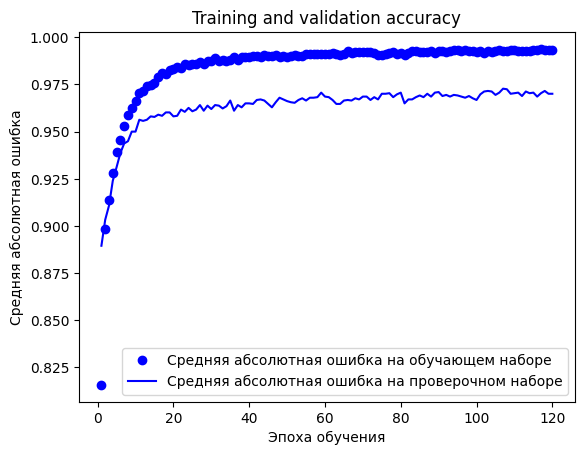

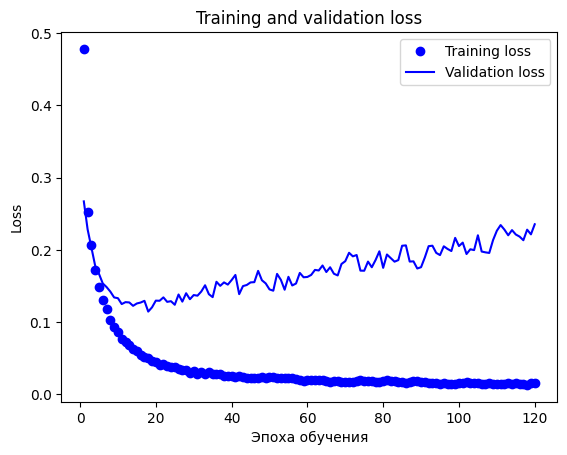

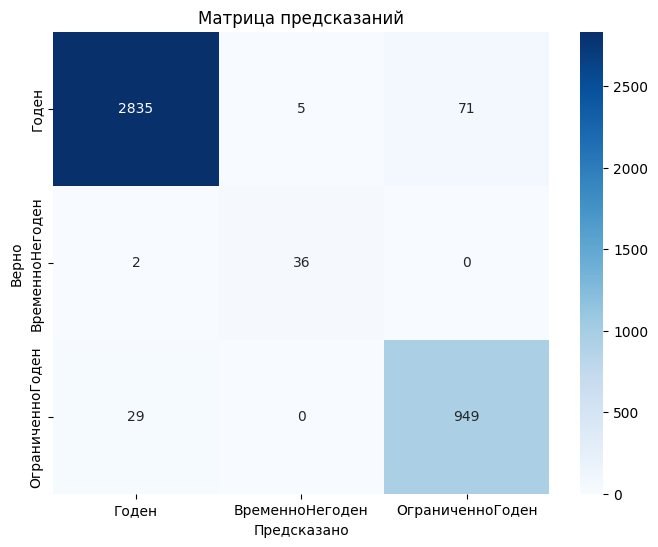

In [ ]:
Print_Predict(model, x_test, y_test)
evaluate_model(model, x_test, y_test)

In [28]:
#  x_data1 = np.hstack([age, sex,work])
#  x_data2 = np.hstack([fit])
#  x_data3 = np.hstack([diagnos, mkb])
#  x_data4 = np.hstack([hazard])
#  x_data5 = np.hstack([prof])
# Экспериментальная модель 5 векторов
input1 = Input((x_train1.shape[1],))
input2 = Input((x_train2.shape[1],))
input3 = Input((x_train3.shape[1],))
input4 = Input((x_train4.shape[1],))
input5 = Input((x_train5.shape[1],))

# Определение скрытых слоев для каждого входного слоя
lay1 = Dense(8, activation='relu')(input1)
lay1 = Dropout(0.25) (lay1)
#lay1 = Dense(16, activation='relu')(lay1)
#lay1 = Dropout(0.25) (lay1)

lay2 = Dense(8, activation='relu')(input2)
lay2 = Dropout(0.25) (lay2)
#lay2 = Dense(16, activation='relu')(lay2)
#lay2 = Dropout(0.25) (lay2)

lay3 = Dense(32, activation='relu')(input3)
lay3 = Dropout(0.25) (lay3)
lay3 = Dense(16, activation='relu')(lay3)
lay3 = Dropout(0.25) (lay3)
#lay3 = Dense(32, activation='relu')(lay3)
#lay3 = Dropout(0.25) (lay3)
#lay3 = Dense(16, activation='relu')(lay3)
#lay3 = Dropout(0.25) (lay3)

lay4 = Dense(8, activation='relu')(input4)
lay4 = Dropout(0.25) (lay4)
#lay4 = Dense(16, activation='relu')(lay4)
#lay4 = Dropout(0.25) (lay4)

lay5 = Dense(8, activation='relu')(input5)
lay5 = Dropout(0.25) (lay5)
#lay5 = Dense(16, activation='relu')(lay5)
#lay5 = Dropout(0.25) (lay5)

merged = concatenate([lay1, lay2, lay3, lay4, lay5])
#merged = Dropout(0.25) (merged)
output = Dense(3, activation='softmax')(merged)

model = Model((input1, input2, input3, input4, input5), output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit([x_train1, x_train2, x_train3, x_train4, x_train5], y_train, validation_data=([x_val1, x_val2, x_val3, x_val4, x_val5], y_val), epochs=150, batch_size=32)

Epoch 1/150
591/591 [==============================] - 3s 3ms/step - loss: 0.4379 - accuracy: 0.8235 - val_loss: 0.2855 - val_accuracy: 0.8775
Epoch 2/150
591/591 [==============================] - 2s 3ms/step - loss: 0.2767 - accuracy: 0.8820 - val_loss: 0.2584 - val_accuracy: 0.8889
Epoch 3/150
591/591 [==============================] - 2s 3ms/step - loss: 0.2451 - accuracy: 0.8918 - val_loss: 0.2421 - val_accuracy: 0.8928
Epoch 4/150
591/591 [==============================] - 2s 3ms/step - loss: 0.2285 - accuracy: 0.9001 - val_loss: 0.2311 - val_accuracy: 0.8972
Epoch 5/150
591/591 [==============================] - 3s 4ms/step - loss: 0.2180 - accuracy: 0.9049 - val_loss: 0.2229 - val_accuracy: 0.8981
Epoch 6/150
591/591 [==============================] - 2s 4ms/step - loss: 0.2063 - accuracy: 0.9091 - val_loss: 0.2146 - val_accuracy: 0.9035
Epoch 7/150
591/591 [==============================] - 2s 3ms/step - loss: 0.1999 - accuracy: 0.9136 - val_loss: 0.2125 - val_accuracy: 0.9050

In [29]:
Print_Predict( model, [x_test1, x_test2, x_test3, x_test4, x_test5], y_test)
evaluate_model(model, [x_test1, x_test2, x_test3, x_test4, x_test5], y_test)

123/123 [==============================] - 0s 1ms/step
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 

NameError: ignored

In [ ]:
# Экспериментальная модель 1 вектор
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/150
148/148 [==============================] - 3s 13ms/step - loss: 0.5958 - accuracy: 0.7674 - val_loss: 0.2831 - val_accuracy: 0.8850
Epoch 2/150
148/148 [==============================] - 2s 13ms/step - loss: 0.3024 - accuracy: 0.8835 - val_loss: 0.2394 - val_accuracy: 0.8987
Epoch 3/150
148/148 [==============================] - 3s 18ms/step - loss: 0.2392 - accuracy: 0.9021 - val_loss: 0.2181 - val_accuracy: 0.9059
Epoch 4/150
148/148 [==============================] - 3s 20ms/step - loss: 0.2013 - accuracy: 0.9165 - val_loss: 0.2022 - val_accuracy: 0.9152
Epoch 5/150
148/148 [==============================] - 2s 11ms/step - loss: 0.1795 - accuracy: 0.9254 - val_loss: 0.1863 - val_accuracy: 0.9203
Epoch 6/150
148/148 [==============================] - 1s 10ms/step - loss: 0.1557 - accuracy: 0.9371 - val_loss: 0.1642 - val_accuracy: 0.9245
Epoch 7/150
148/148 [==============================] - 1s 9ms/step - loss: 0.1393 - accuracy: 0.9450 - val_loss: 0.1535 - val_accuracy: 

123/123 [==============================] - 1s 3ms/step
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 1 | Верный класс: 1 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 

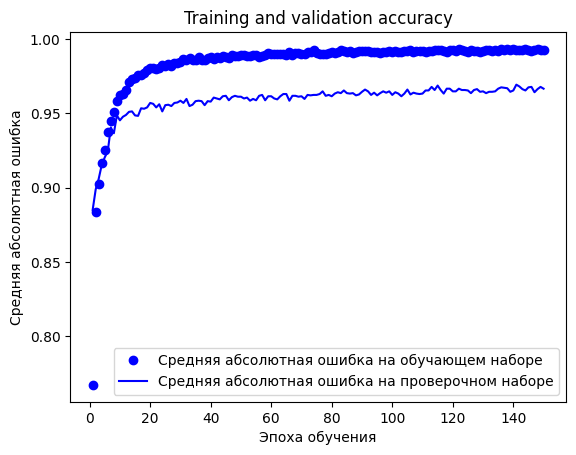

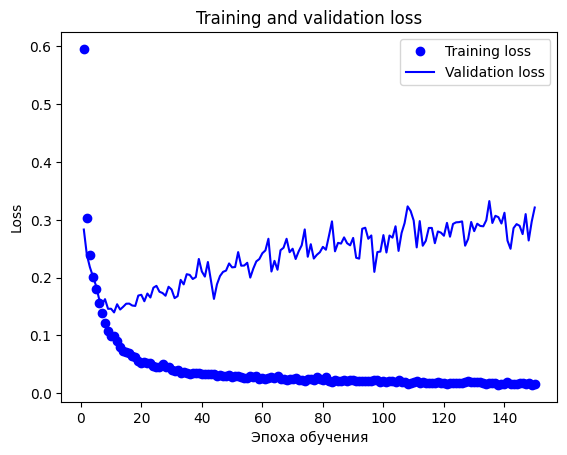

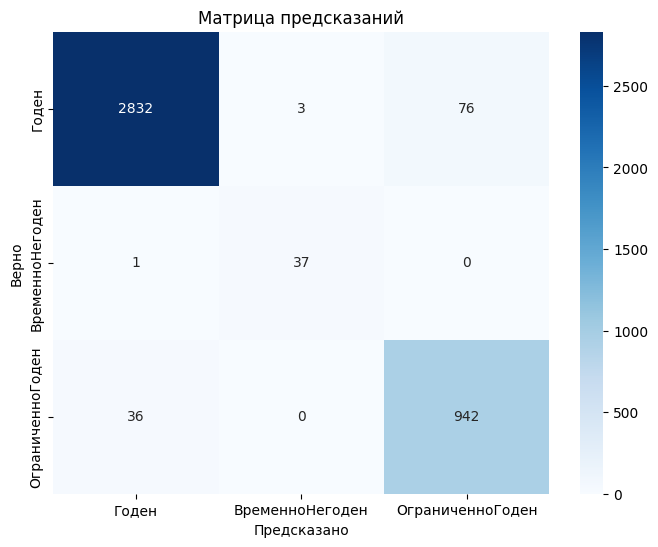

In [ ]:
Print_Predict(model, x_test, y_test)
evaluate_model(model, x_test, y_test)